## 로지스틱 회귀 (Logistic Regression)

### 시그모이드 함수(Sigmoid Function) 특성

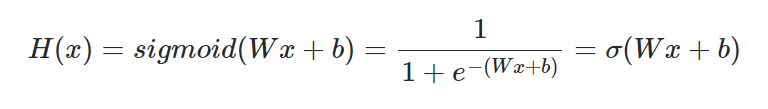

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) # [-5.0, -4.9, -4.8 ,,,,,, 4.8, 4.9]
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#### w 에 따른 변화

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#### b 에 따른 변화

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 로지스틱 회귀 귀현

#### 패키지 불러오기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

#### 데이터 로딩

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

#### 모델 초기화

In [ ]:
model = nn.Linear(2,1)

#### 가설 수립 (sigmoid)

In [ ]:
hypothesis = 1 / (1 + torch.exp(-(model(x_train))))

In [ ]:
print(hypothesis)

In [ ]:
hypothesis = torch.sigmoid(model(x_train))

In [ ]:
print(hypothesis)
# print(y_train)

#### 비용함수 계산

In [ ]:
losses = -(y_train * torch.log(hypothesis) +
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

In [ ]:
cost = losses.mean()
print(cost)

In [ ]:
cost = F.binary_cross_entropy(hypothesis, y_train)
print(cost)

#### 코드 정리 및 학습

In [ ]:
# 데이터 로딩
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
model = nn.Linear(2,1)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(model(x_train))
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [ ]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

#### nn.Module 간소화 실습

In [ ]:
# 데이터 로딩
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis =  1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
    cost = -(y_train * torch.log(hypothesis) +
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

## 소프트맥스 회귀(Softmax Regression)

### 소프트맥스를 왜 쓰는가

In [ ]:
z = torch.FloatTensor([1, 2]) # 0.333 vs 0.666
print(F.softmax(z, dim=0))

z = torch.FloatTensor([11, 12]) # 0.478 vs 0.522
print(F.softmax(z, dim=0))

z = torch.FloatTensor([10, 20]) # 0.333 vs 0.666
print(F.softmax(z, dim=0))

### 소프트맥스 비용함수 구현해보기

#### softmax 기반 예측 결과 생성

In [ ]:
z = torch.rand(3, 5, requires_grad=True)

In [ ]:
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

#### 실제 결과 생성


In [ ]:
y = torch.randint(5, (3,)).long()
print(y)

In [ ]:
# 원-핫 인코딩
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

#### 비용 계산

In [ ]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)